In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
import pandas as pd
from tqdm import tqdm

Пример 1. Вычислите оценки для опционов колл на отношение для
$\sigma_1=0.3$, $\sigma_2=0.4$, $b_1=0.05$,
$b_2=0.03$, $r=0.07$, $S_1=130$, $S_2=100$, $T=0.25, 0.5$, $\rho=\{-0.5, 0, 0.5\}$ и $K=0.1, 0.2, \ldots, 1.0, 2.0, 3.0$, безрисковая ставка 7\%.

In [2]:
sigma1 = 0.3
sigma2 = 0.4
b1 = 0.05
b2 = 0.03
r = 0.07
S1 = 130
S2 = 100
T_range = [0.25, 0.5]
rho_range = [-0.5, 0, 0.5]
K_range = list(np.arange(0.1, 1.1, 0.1))

In [3]:
# оценка стоимости опциона колл на отношение цен двух активов
def quotient_call_price_Zhang(K, rho, T):
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    c = np.exp(-r * T) * (F * norm.cdf(d2) - K * norm.cdf(d1))

    return c

In [4]:
outperformance_df_call = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_call_price_Zhang(K, rho, T)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

In [5]:
call_df = pd.pivot_table(outperformance_df_call, values='price', index=['K'], columns=['T', 'rho'])

In [6]:
call_df

T        0.25                          0.50                    
rho      -0.5       0.0       0.5      -0.5       0.0       0.5
K                                                              
0.1  1.258176  1.237981  1.218087  1.318772  1.276942  1.236349
0.2  1.159910  1.139716  1.119822  1.222211  1.180382  1.139789
0.3  1.061645  1.041450  1.021556  1.125658  1.083821  1.043228
0.4  0.963381  0.943185  0.923291  1.029201  0.987271  0.946668
0.5  0.865142  0.844921  0.825026  0.933227  0.890826  0.850109
0.6  0.767100  0.746686  0.726761  0.838607  0.794886  0.753578
0.7  0.669880  0.648681  0.628502  0.746640  0.700395  0.657273
0.8  0.574835  0.551674  0.530344  0.658795  0.608852  0.561914
0.9  0.484000  0.457423  0.432896  0.576419  0.522055  0.469130
1.0  0.399660  0.368638  0.338213  0.500532  0.441702  0.381422

Задача 1. Повторите вычисления для опционов пут, выполните проверку через паритет опционов и сделайте выводы.

In [7]:
# оценка стоимости опциона пут на отношение цен двух активов
def quotient_put_price_Zhang(K, rho, T):
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    p = np.exp(-r * T) * (K * norm.cdf(-d1) - F * norm.cdf(-d2))
    return p

In [8]:
outperformance_df_put = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_put_price_Zhang(K, rho, T)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

In [9]:
put_df = pd.pivot_table(outperformance_df_put, values='price', index=['K'], columns=['T', 'rho'])

In [10]:
put_df

T            0.25                                      0.50                \
rho          -0.5           0.0           0.5          -0.5           0.0   
K                                                                           
0.1  3.778084e-20  6.901476e-28  1.250578e-49  5.123091e-12  4.854537e-16   
0.2  2.487462e-12  1.411677e-16  2.177139e-28  7.989515e-08  4.387780e-10   
0.3  9.205951e-09  1.827384e-11  6.814500e-19  7.344569e-06  2.454494e-07   
0.4  1.134986e-06  1.683099e-08  1.869670e-13  1.112457e-04  1.041540e-05   
0.5  2.695529e-05  1.424162e-06  5.708291e-10  6.978822e-04  1.261876e-04   
0.6  2.507371e-04  3.109487e-05  1.365790e-07  2.637833e-03  7.469382e-04   
0.7  1.295519e-03  2.910915e-04  6.678895e-06  7.231218e-03  2.815519e-03   
0.8  4.515951e-03  1.549517e-03  1.137204e-04  1.594718e-02  7.833919e-03   
0.9  1.194655e-02  5.564030e-03  9.309483e-04  3.013163e-02  1.759664e-02   
1.0  2.587163e-02  1.504463e-02  4.512810e-03  5.080542e-02  3.380455e-02   

T                  
rho           0.5  
K                  
0.1  3.181683e-27  
0.2  2.895217e-16  
0.3  2.671441e-11  
0.4  2.054317e-08  
0.5  1.562804e-06  
0.6  3.195037e-05  
0.7  2.870075e-04  
0.8  1.489080e-03  
0.9  5.265529e-03  
1.0  1.411781e-02

In [11]:
# parity for qoutient put / call
# P + S1 / S2 = C + K * exp{-rT}


put_call_parity = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'parity_error_estimation': quotient_call_price_Zhang(K, rho, T) + K * np.exp(-r * T) - S1 / S2 - quotient_put_price_Zhang(K, rho, T)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

In [12]:
put_call_parity_df = pd.pivot_table(put_call_parity, values='parity_error_estimation', index=['K'], columns=['T', 'rho'])

In [13]:
put_call_parity_df

T        0.25                          0.50                   
rho      -0.5       0.0       0.5      -0.5       0.0      0.5
K                                                             
0.1  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
0.2  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
0.3  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
0.4  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
0.5  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
0.6  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
0.7  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
0.8  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
0.9  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291
1.0  0.056441  0.036246  0.016352  0.115332  0.073503  0.03291

Пример 2. Вычислите оценки для опционов колл на произведение цен для $K=15000$, $S_1=100$, $S_2=105$, $b_1=0.02$, $b_2=0.05$, $T=0.5, 1$, $\sigma_1=\{0.2, 0.3, 0.4\}$, $\sigma_2=0.3$, безрисковая ставка $r=0.07$.

In [14]:
K = 15000
b1 = 0.02
b2 = 0.05
r = 0.07
S1 = 100
S2 = 105
T_range = [0.1, 0.5]
rho_range = [-0.5, 0, 0.5]
sigma1_range = [0.2, 0.3, 0.4]
sigma2 = 0.3

In [15]:
#  оценка стоимости опциона колл на произведение цен двух активов
def product_call_price(sigma1, rho, T):

    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    c = np.exp(-r * T) * (F * norm.cdf(d2) - K * norm.cdf(d1))

    return c

In [16]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': 0.3,
        'rho': rho,
        'T': T,
        'price': product_call_price(sigma1, rho, T)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                   0.1                              0.5              \
rho                -0.5       0.0        0.5        -0.5         0.0   
sigma1 sigma2                                                          
0.2    0.3     0.002812  0.428850   3.295569   32.613246  154.337957   
0.3    0.3     0.026672  2.402646  13.261771   56.773262  266.159407   
0.4    0.3     0.353503  9.327321  35.490780  118.150427  425.940177   

T                          
rho                   0.5  
sigma1 sigma2              
0.2    0.3     319.714092  
0.3    0.3     531.789411  
0.4    0.3     787.974208

Задача 2. Повторите вычисления для опционов пут, выполните проверку через паритет опционов и сделайте выводы.

In [17]:
#  оценка стоимости опциона пут на произведение цен двух активов
def product_put_price(sigma1, rho, T):

    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    p = -np.exp(-r * T) * (F * norm.cdf(-d2) - K * norm.cdf(-d1))

    return p

In [18]:
prices_put_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': 0.3,
        'rho': rho,
        'T': T,
        'price': product_put_price(sigma1, rho, T)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_put_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                      0.1                                    0.5  \
rho                   -0.5          0.0          0.5         -0.5   
sigma1 sigma2                                                       
0.2    0.3     4426.822253  4395.795494  4367.114916  4173.019124   
0.3    0.3     4442.537163  4397.769290  4361.271943  4274.466515   
0.4    0.3     4458.531524  4404.693965  4367.668045  4412.553568   

T                                        
rho                    0.0          0.5  
sigma1 sigma2                            
0.2    0.3     4138.419201  4145.108158  
0.3    0.3     4250.240651  4276.942796  
0.4    0.3     4410.021421  4452.282846

In [19]:
# parity for qoutient put / call
# P + S1 * S2 * exp{(b1 - b2)T} = C + K * exp{-rT}

put_call_parity_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': 0.3,
        'rho': rho,
        'T': T,
        'price': product_put_price(sigma1, rho, T) + S1 * S2 * np.exp((b1 - b2) * T) - product_call_price(sigma1, rho, T) - K * np.exp(-r * T)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(put_call_parity_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                   0.1                                 0.5              \
rho                -0.5        0.0        0.5          -0.5         0.0   
sigma1 sigma2                                                             
0.2    0.3      0.00000 -31.452797 -63.000095  1.818989e-12 -156.324634   
0.3    0.3     15.69105 -31.452797 -78.809269  7.728738e+01 -156.324634   
0.4    0.3     31.35858 -31.452797 -94.642176  1.539973e+02 -156.324634   

T                          
rho                   0.5  
sigma1 sigma2              
0.2    0.3    -315.011813  
0.3    0.3    -395.252493  
0.4    0.3    -476.097241

Задача 3 (Zhang, 1998, p. 428).
Предположим, что есть две акции со спотовыми ценами $S_1 = S_2 = 100$, волатильностью $\sigma_1 = 18\%$ и $\sigma_2 = 15\%$ и ставками дивидендов $q_1 = 4\%$, $q_2 = 3\%$, коэффициент корреляции доходностей  $\rho=0.75$, безрисковая ставка $r = 5\%$ и цена исполнения опциона $K = 1$. Оцените цены опционов колл и пут по отношению цены первого актива к цене второго срок действия актива истекает через год.


Ответ: call=0.0453, put=0.0557

## Basket Options

Пример 3. В рамках модели Блэка-Шоулза вычислите цены опциона колл на корзину с четырьмя акциями, для которых $T = 5~лет$, безрисковая ставка $r = 0$, корреляция $\rho_{ij} = 0,5$, $\forall i \neq j$, $K = 100$, $F^T_i = 100$, $σ_i = 40\%$ и $w_i = 0,25, i, j = 1, 2, 3, 4$. Используйте аппроксимацию средним геометрическим и сравните результаты с моделированием Монте-Карло.

In [21]:
T = 5
r = 0
K = 100
N = 4
rho   = np.ones((N, N)) * 0.5 + np.eye(N) * 0.5
F     = np.array([100., 100., 100., 100.])
sigma = np.array([0.4, 0.4, 0.4, 0.4])
w     = np.array([1/N, 1/N, 1/N, 1/N])

In [22]:
rho

array([[1. , 0.5, 0.5, 0.5],
       [0.5, 1. , 0.5, 0.5],
       [0.5, 0.5, 1. , 0.5],
       [0.5, 0.5, 0.5, 1. ]])

## Geometric average approximation

In [23]:
# аппроксимация корзины опционов геометрическим средним
def geometric_average_approximation_basket_call(F, K, T, w, r, rho, sigma):
    a = w * F / np.sum(w * F)

    m_tilde = np.log(np.sum(w * F)) - 0.5 * np.sum(a * sigma ** 2 * T)
    v_tilde = np.sqrt((a * sigma).T @ rho @ (a * sigma) * T)

    K_star =  K - np.sum(w * F) + np.exp(m_tilde + 0.5 * v_tilde ** 2)

    d1 = (m_tilde - np.log(K_star) + v_tilde ** 2) / v_tilde
    d2 = d1 - v_tilde

    basket_call = np.exp(-r * T) * (np.exp(m_tilde + 0.5 * v_tilde ** 2) * norm.cdf(d1) - K_star * norm.cdf(d2))

    return basket_call

Задача.
Реализуйте функции для получения аппроксимаций с применением следующих методов:

Метод условного математического ожидания (Beisser).

Метод моментов (Levy).

Аппроксимация через обратное геометрическое распределение (MP).

Сравните полученные аппроксимации графически (постройте функции распределения).

In [26]:
from scipy.stats import gamma

def calc_v2(w, F, sigma, rho, T):
    v2 = 0
    for i in range(F.shape[0]):
        for j in range(F.shape[0]):
            v2 += w[i] * w[j] * F[i] * F[j] * np.exp(sigma[i] * sigma[j] * rho[i, j] * T)
    
    return v2

def Beisser_approximation_basket_call(F, K, T, w, r, rho, sigma):
    d1, d2 = np.zeros_like(F), np.zeros_like(F)
    sigma_t = np.zeros_like(F)
    basket_call = 0
    
    for i in range(F.shape[0]):
        sigma_t[i] = sigma[i] * 0.5
        d1[i] = (np.log(F[i] / K_t[i]) + r + sigma_t[i]**2 / 2) / sigma_t[i] / np.sqrt(T)
        d2[i] = d1[i] - sigma_t[i] * np.sqrt(T)
        basket_call += w[i] * (F[i] * norm.cdf(d1[i]) - np.exp(-r * T) * K_t[i] * norm.cdf(d2[i]))
    return basket_call

def Levy_approximation_basket_call(F, K, T, w, r, rho, sigma):
    M = np.sum(w * F) 
    v2 = calc_v2(w, F, sigma, rho, T)
    m = 2 * np.log(M) - 0.5 * np.log(v2)
    v2 = np.log(v2) - 2 * np.log(M)
    d1 = (m - np.log(K) + v2) / np.sqrt(v2)
    d2 = d1 - np.sqrt(v2)
    basket_call = np.exp(-r * T) * (M * norm.cdf(d1) - K * norm.cdf(d2))
    return basket_call

def Milevsky_Posner_approximation_basket_call(F, K, T, w, r, rho, sigma):
    M = np.sum(w * F) 
    v2 = calc_v2(w, F, sigma, rho, T)
    alpha = (2 * v2 - M**2) / (v2 - M**2)
    beta = (v2 - M**2) / (v2 * M)
    basket_call = np.exp(-r * T) * ((M * gamma.cdf(1 / K, a = alpha - 1, scale = beta)) - K * gamma.cdf(1 / K, a = alpha, scale = beta))
    return basket_call

def pdfs_comparison():
    # ????
    return plot_pdf_curves


## Monte-Carlo simulations

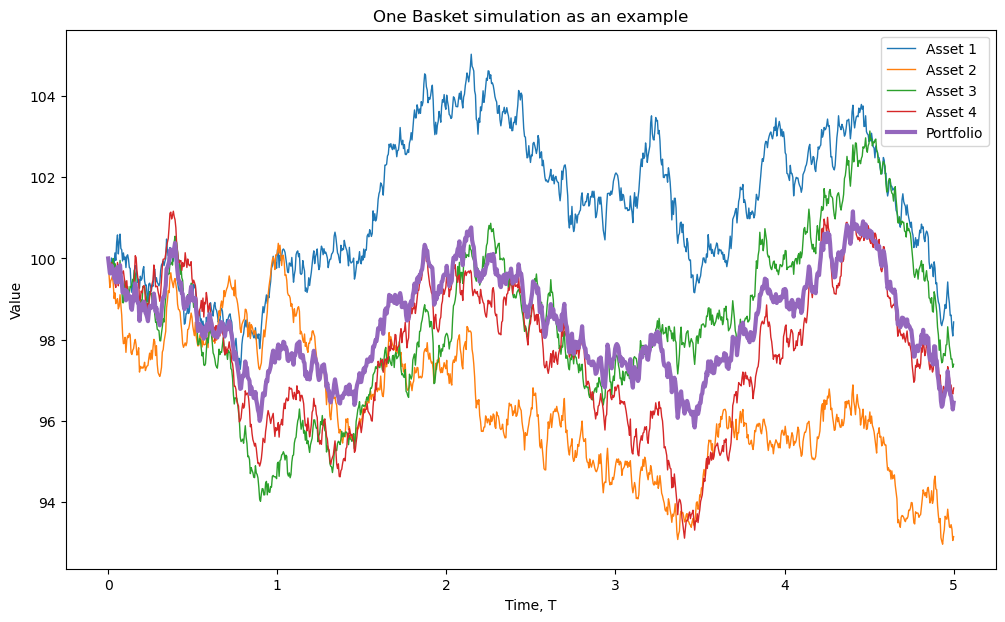

In [29]:
# Пример одной симуляции методом Монте-Карло для равновесной корзины опционов

n_steps = 1000
dt = T / (n_steps - 1)
S_t = np.zeros((n_steps, 4))
S_t[0] = F
COV = sigma.T * rho * sigma
for i in range(n_steps - 1):
    dW = np.random.multivariate_normal(np.zeros(4), COV) * dt
    dS = r * S_t[i] * dt + S_t[i] * dW
    S_t[i + 1] = S_t[i] + dS

plt.figure(figsize=(12, 7))
t_grid = np.linspace(0, T, n_steps)
plt.plot(t_grid, S_t, lw=1, label = [f'Asset {i + 1}' for i in range(N)])
plt.plot(t_grid, S_t @ w, lw=3,  label='Portfolio')
plt.xlabel('Time, T')
plt.ylabel('Value')
plt.title('One Basket simulation as an example')
plt.legend()
plt.show()

In [31]:
n_sims = 10000
n_steps = 5000

dt = T / (n_steps - 1)
COV = sigma.T * rho * sigma

S = np.zeros((n_sims, 4))
S[...] = F

for i in tqdm(range(n_steps - 1)):
    dW = np.random.multivariate_normal(np.zeros(4), COV, size=n_sims) * np.sqrt(dt)
    dS = r * S * dt + S * dW
    S += dS

portfolio_values = S @ w
call_price_mc = np.maximum(portfolio_values - K, 0).mean()
put_price_mc = np.maximum(K - portfolio_values, 0).mean()

print('Call price by Monte-Carlo:', call_price_mc)
print('Put price by Monte-Carlo:', put_price_mc)

100%|██████████████████████████████████████████████████████████████████████████████| 4999/4999 [00:06<00:00, 819.26it/s]

Call price by Monte-Carlo: 28.22854425217308
Put price by Monte-Carlo: 28.006650163228134


Задача. Для метода Монте-Карло реализуйте функцию для вычисления стандартного отклонения
$
StdDev = \sqrt{\frac{1}{n}\sum_{i=1}^n(Price - MC\,Price)^2}
$
и постройте доверительный интервал для оценки.

In [32]:
def StdDev_MC():
    price_std = np.sqrt( np.sum( (portfolio_values - portfolio_values.mean())**2 ) / portfolio_values.shape[0] )
    return price_std

def CI_MC(price, price_std):
    lo = price - norm.ppf(0.975)*price_std    # lower bound of confidence interval for the price
    hi = price + norm.ppf(0.975)*price_std    # upper bound of confidence interval for the price
    ci = np.stack([lo, price, hi])
    return ci

In [33]:
std_price = StdDev_MC()

In [34]:
CI_MC(portfolio_values.mean(), std_price)

array([-61.98831039, 100.22189409, 262.43209857])

Задача.
Проведите исследование влияния параметров (варьировать один параметр, остальные -- зафиксировать) для различных методов аппроксимации и постройте графики, на которых отобразите зависимость для следующих значений параметров:  

Цена страйк $K=\{50, 60, \ldots, 130\}$,

Форвардная цена $F^T=\{50, 60, \ldots, 130\}$,

Корреляция  $\rho=\{0.1, 0.2, \ldots, 0.9, 0.95\}$,

Волатильность $\sigma=\{0.1, 0.2, \ldots, 0.9, 1.0\}$,

Веса $w_1 = \{0.5, 0.2, 0.2, 0.1\}$, $w_2 = \{0.7, 0.1, 0.1, 0.1\}$,

Безрисковая ставка $r=\{0.01, 0.02, 0.05, 0.1\}$.


In [35]:
strikes = [10*i for i in range(5, 14)]
forwards = [10*i for i in range(5, 14)]
correlations = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
volatilities = [0.1 * i for i in range(11)]
weights = [[0.5, 0.2, 0.2, 0.1], [0.7, 0.1, 0.1, 0.1]]
rates = [0.01, 0.02, 0.05, 0.1]

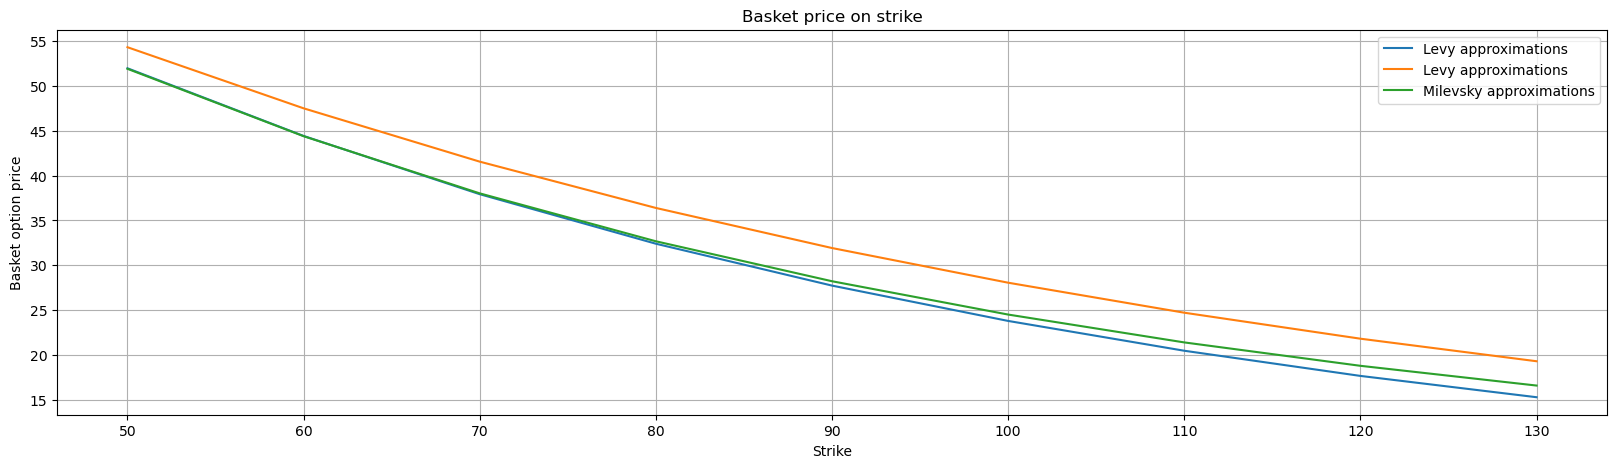

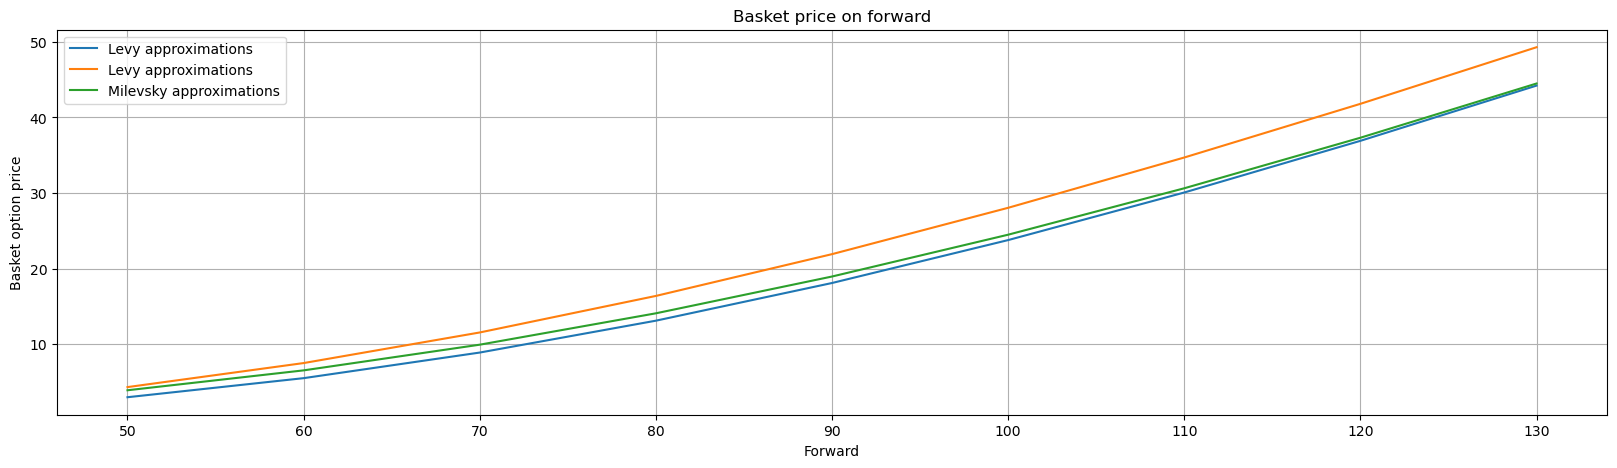

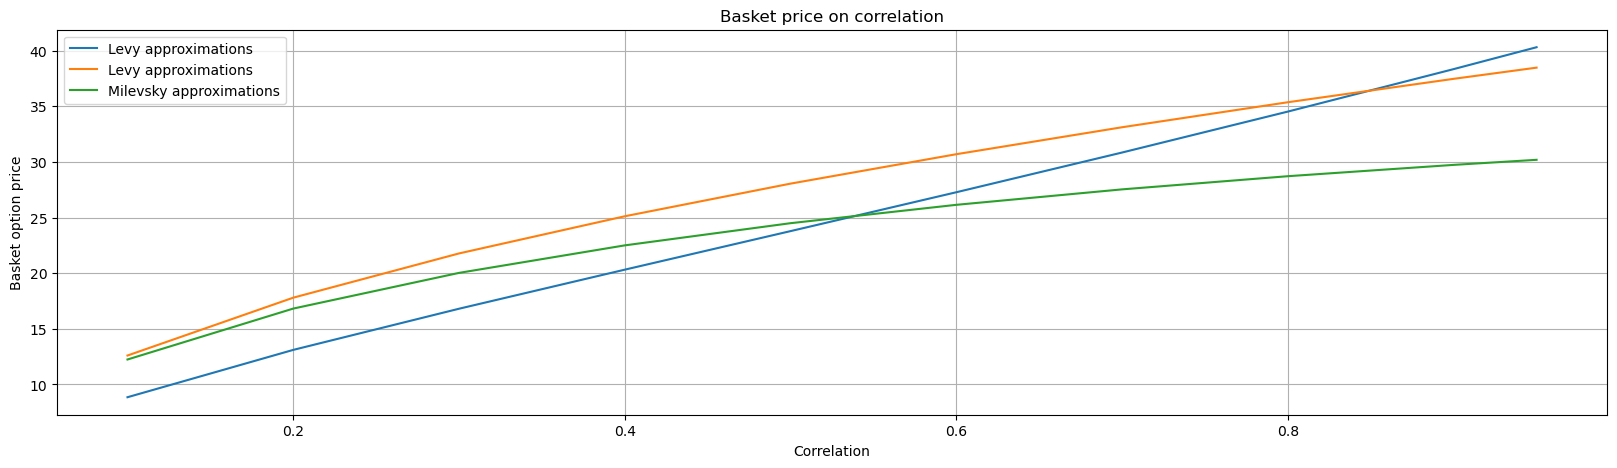

/tmp/ipykernel_36099/3054862703.py:10: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (m_tilde - np.log(K_star) + v_tilde ** 2) / v_tilde
/tmp/ipykernel_36099/174995920.py:28: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (m - np.log(K) + v2) / np.sqrt(v2)
/tmp/ipykernel_36099/174995920.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = (2 * v2 - M**2) / (v2 - M**2)
/home/polovnikov/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


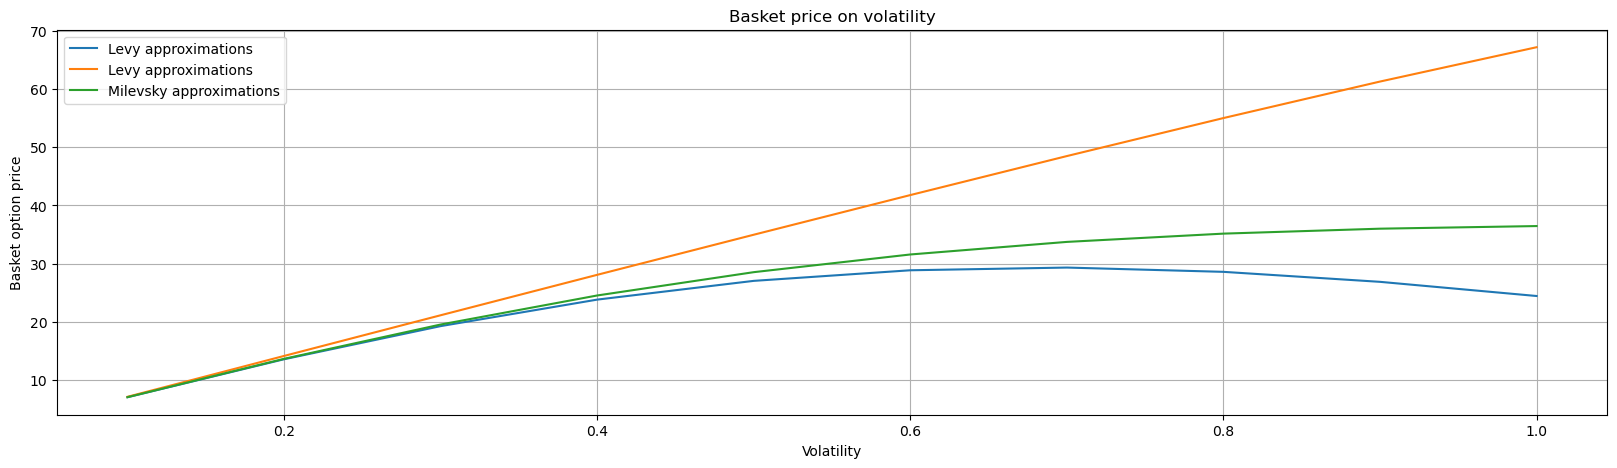

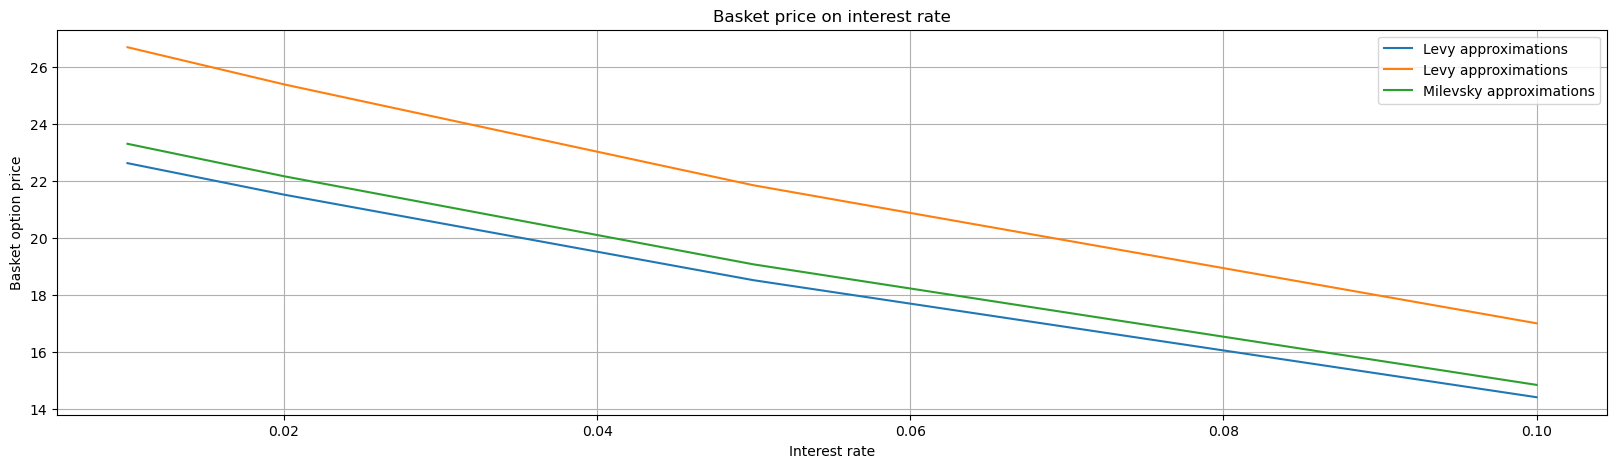

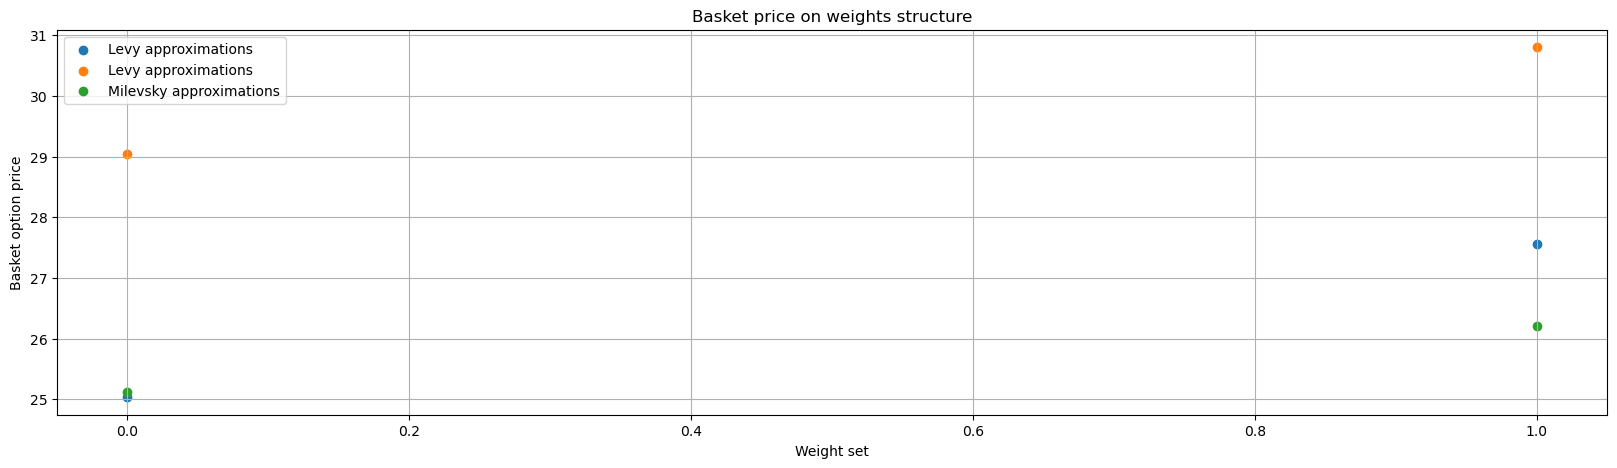

In [41]:
''' strikes '''
plt.figure(figsize=(20,5))
plt.grid()
plt.title('Basket price on strike')

geom_prices, levy_prices, milevsky_prices = [], [], []

for strike in strikes:
    geom_prices.append(geometric_average_approximation_basket_call(F, strike, T, w, r, rho, sigma))
    levy_prices.append(Levy_approximation_basket_call(F, strike, T, w, r, rho, sigma))
    milevsky_prices.append(Milevsky_Posner_approximation_basket_call(F, strike, T, w, r, rho, sigma))
    
plt.plot(strikes, geom_prices, label='Levy approximations') 
plt.plot(strikes, levy_prices, label='Levy approximations')
plt.plot(strikes, milevsky_prices, label='Milevsky approximations')
plt.legend()
plt.xlabel('Strike')
plt.ylabel('Basket option price')
plt.show()

''' forwards '''

plt.figure(figsize=(20,5))
plt.grid()
plt.title('Basket price on forward')

geom_prices, levy_prices, milevsky_prices = [], [], []

for forward in forwards:
    fwd = np.full(shape=F.shape, fill_value=forward)
    geom_prices.append(geometric_average_approximation_basket_call(fwd, K, T, w, r, rho, sigma))
    levy_prices.append(Levy_approximation_basket_call(fwd, K, T, w, r, rho, sigma))
    milevsky_prices.append(Milevsky_Posner_approximation_basket_call(fwd, K, T, w, r, rho, sigma))
    
plt.plot(forwards, geom_prices, label='Levy approximations') 
plt.plot(forwards, levy_prices, label='Levy approximations')
plt.plot(forwards, milevsky_prices, label='Milevsky approximations')
plt.legend()
plt.xlabel('Forward')
plt.ylabel('Basket option price')
plt.show()

''' correlations '''

plt.figure(figsize=(20,5))
plt.grid()
plt.title('Basket price on correlation')

geom_prices, levy_prices, milevsky_prices = [], [], []

for corr in correlations:
    new_rho   = np.ones((N, N)) * corr + np.eye(N) * corr
    geom_prices.append(geometric_average_approximation_basket_call(F, K, T, w, r, new_rho, sigma))
    levy_prices.append(Levy_approximation_basket_call(F, K, T, w, r, new_rho, sigma))
    milevsky_prices.append(Milevsky_Posner_approximation_basket_call(F, K, T, w, r, new_rho, sigma))
    
plt.plot(correlations, geom_prices, label='Levy approximations') 
plt.plot(correlations, levy_prices, label='Levy approximations')
plt.plot(correlations, milevsky_prices, label='Milevsky approximations')
plt.legend()
plt.xlabel('Correlation')
plt.ylabel('Basket option price')
plt.show()

''' volatilities '''

plt.figure(figsize=(20,5))
plt.grid()
plt.title('Basket price on volatility')

geom_prices, levy_prices, milevsky_prices = [], [], []

for volatility in volatilities:
    volat = np.full_like(F, fill_value=volatility)
    geom_prices.append(geometric_average_approximation_basket_call(F, K, T, w, r, rho, volat))
    levy_prices.append(Levy_approximation_basket_call(F, K, T, w, r, rho, volat))
    milevsky_prices.append(Milevsky_Posner_approximation_basket_call(F, K, T, w, r, rho, volat))
    
plt.plot(volatilities, geom_prices, label='Levy approximations') 
plt.plot(volatilities, levy_prices, label='Levy approximations')
plt.plot(volatilities, milevsky_prices, label='Milevsky approximations')
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Basket option price')
plt.show()

''' interest rates '''

plt.figure(figsize=(20,5))
plt.grid()
plt.title('Basket price on interest rate')

geom_prices, levy_prices, milevsky_prices = [], [], []

for rate in rates:
    geom_prices.append(geometric_average_approximation_basket_call(F, K, T, w, rate, rho, sigma))
    levy_prices.append(Levy_approximation_basket_call(F, K, T, w, rate, rho, sigma))
    milevsky_prices.append(Milevsky_Posner_approximation_basket_call(F, K, T, w, rate, rho, sigma))
    
plt.plot(rates, geom_prices, label='Levy approximations') 
plt.plot(rates, levy_prices, label='Levy approximations')
plt.plot(rates, milevsky_prices, label='Milevsky approximations')
plt.legend()
plt.xlabel('Interest rate')
plt.ylabel('Basket option price')
plt.show()

''' weights '''

plt.figure(figsize=(20,5))
plt.grid()
plt.title('Basket price on weights structure')

geom_prices, levy_prices, milevsky_prices = [], [], []

for w_set in weights:
    ws = np.asarray(w_set)
    geom_prices.append(geometric_average_approximation_basket_call(F, K, T, ws, r, rho, sigma))
    levy_prices.append(Levy_approximation_basket_call(F, K, T, ws, r, rho, sigma))
    milevsky_prices.append(Milevsky_Posner_approximation_basket_call(F, K, T, ws, r, rho, sigma))
    
plt.scatter([0,1], geom_prices, label='Levy approximations') 
plt.scatter([0,1], levy_prices, label='Levy approximations')
plt.scatter([0,1], milevsky_prices, label='Milevsky approximations')
plt.legend()
plt.xlabel('Weight set')
plt.ylabel('Basket option price')
plt.show()